# Importing libraries

In [83]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
import pickle


%matplotlib inline
sns.set()

# import data

In [29]:
df_attrition_pred=pd.read_excel("Hash-Analytic-Python-Analytics-Problem-case-study-1.xlsx","Existing employees")

# Data exploration

In [30]:
df_attrition_pred.head()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
0,2001,0.58,0.74,4,215,3,0,0,sales,low
1,2002,0.82,0.67,2,202,3,0,0,sales,low
2,2003,0.45,0.69,5,193,3,0,0,sales,low
3,2004,0.78,0.82,5,247,3,0,0,sales,low
4,2005,0.49,0.60,3,214,2,0,0,sales,low


# Descriptive statistics

In [6]:
df_attrition_pred.describe()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
count,11428.000000,11428.000000,11428.000000,11428.000000,11428.000000,11428.000000,11428.000000,11428.000000
mean,7812.340742,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
std,3453.947461,0.217104,0.162005,0.979884,45.682731,1.562348,0.379991,0.159889
min,2001.000000,0.120000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000
25%,4857.750000,0.540000,0.580000,3.000000,162.000000,2.000000,0.000000,0.000000
50%,7714.500000,0.690000,0.710000,4.000000,198.000000,3.000000,0.000000,0.000000
75%,10571.250000,0.840000,0.850000,4.000000,238.000000,4.000000,0.000000,0.000000
max,14211.000000,1.000000,1.000000,6.000000,287.000000,10.000000,1.000000,1.000000


In [7]:
# Checking the missing values
df_attrition_pred.isnull().sum()

Emp ID                   0
satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
promotion_last_5years    0
dept                     0
salary                   0
dtype: int64

# Data segmentation

# Importing segment model

In [10]:
scaler=pickle.load(open('scaler.pickle','rb'))

In [11]:
kmeans=pickle.load(open('kmeans.pickle','rb'))

In [32]:
features=['satisfaction_level','last_evaluation','number_project','average_montly_hours','time_spend_company','Work_accident',
         'promotion_last_5years','dept','salary']
df= df_attrition_pred[features]

In [33]:
le=LabelEncoder()
df['Salary']=le.fit_transform(df['salary'])
df_attrition_pred1=df.drop(['salary'],axis=1)

In [34]:
df_attrition_pred1

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,Salary
0,0.58,0.74,4,215,3,0,0,sales,1
1,0.82,0.67,2,202,3,0,0,sales,1
2,0.45,0.69,5,193,3,0,0,sales,1
3,0.78,0.82,5,247,3,0,0,sales,1
4,0.49,0.60,3,214,2,0,0,sales,1
...,...,...,...,...,...,...,...,...,...
11423,0.90,0.55,3,259,10,1,1,management,0
11424,0.74,0.95,5,266,10,0,1,management,0
11425,0.85,0.54,3,185,10,0,1,management,0
11426,0.33,0.65,3,172,10,0,1,marketing,0


In [35]:
# Standardisation of the data.
# Let preprocess data
df_attrion_predx=pd.get_dummies(df_attrition_pred1)

# Standardization 

In [36]:
df_pred_std=scaler.fit_transform(df_attrion_predx)

In [37]:
attrition_kmeans=kmeans.predict(df_pred_std)

In [38]:
attrition_kmeans

array([1, 3, 1, ..., 0, 0, 2])

In [40]:
df_attrition_predictors=df_attrition_pred.copy()

In [41]:
df_attrition_predictors['Segment']=attrition_kmeans

# Data analysis by employees

In [42]:
# Descriptive statistics
df_attrition_predictors.head()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,Segment
0,2001,0.58,0.74,4,215,3,0,0,sales,low,1
1,2002,0.82,0.67,2,202,3,0,0,sales,low,3
2,2003,0.45,0.69,5,193,3,0,0,sales,low,1
3,2004,0.78,0.82,5,247,3,0,0,sales,low,1
4,2005,0.49,0.60,3,214,2,0,0,sales,low,3


In [64]:
temp1=df_attrition_predictors[['Emp ID','satisfaction_level']].groupby(['Emp ID'],as_index=False).count()
temp1=temp1.set_index('Emp ID')
temp1

,satisfaction_level
Emp ID,
2001,1
2002,1
2003,1
2004,1
2005,1
...,...
14207,1
14208,1
14209,1


In [62]:
temp2=df_attrition_predictors[['Emp ID','satisfaction_level']].groupby(['Emp ID'],as_index=False).sum()
temp2=temp2.set_index('Emp ID')
temp2=temp2.rename(columns={'satisfaction_level':'Chances of leaving'})
temp2

,Chances of leaving
Emp ID,
2001,0.58
2002,0.82
2003,0.45
2004,0.78
2005,0.49
...,...
14207,0.90
14208,0.74
14209,0.85


In [65]:
temp3=temp1.join(temp2)
temp3

,satisfaction_level,Chances of leaving
Emp ID,,
2001,1,0.58
2002,1,0.82
2003,1,0.45
2004,1,0.78
2005,1,0.49
...,...,...
14207,1,0.90
14208,1,0.74
14209,1,0.85


In [68]:
temp4=df_attrition_predictors[['Emp ID','Segment']].groupby(['Emp ID'],as_index=False).mean()
temp4=temp4.set_index('Emp ID')
temp4

,Segment
Emp ID,
2001,1
2002,3
2003,1
2004,1
2005,3
...,...
14207,0
14208,0
14209,0


In [69]:
employees_desc=temp3.join(temp4)
employees_desc

,satisfaction_level,Chances of leaving,Segment
Emp ID,,,
2001,1,0.58,1
2002,1,0.82,3
2003,1,0.45,1
2004,1,0.78,1
2005,1,0.49,3
...,...,...,...
14207,1,0.90,0
14208,1,0.74,0
14209,1,0.85,0


In [71]:
segm_proportion=employees_desc[['satisfaction_level','Segment']].groupby(['Segment']).count()/employees_desc.shape[0]
segm_proportion=segm_proportion.rename(columns={'satisfaction_level':'Segment_proportions'})
segm_proportion.head()

,Segment_proportions
Segment,
0,0.231537
1,0.253063
2,0.083479
3,0.431922


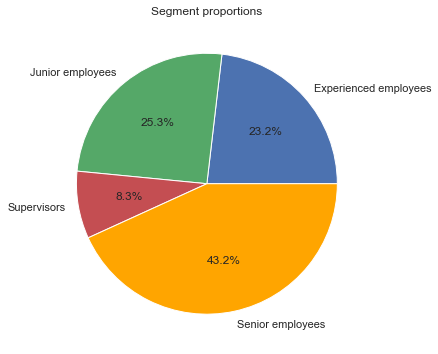

In [75]:
plt.figure(figsize=(12,6))
plt.pie(segm_proportion['Segment_proportions'],
        labels=['Experienced employees','Junior employees','Supervisors','Senior employees'],
       autopct='%1.1f%%',
       colors=('b','g','r','orange'))
plt.title("Segment proportions")
plt.show();